# Heart Disease Prediction
### Neural Network Model Definition and Training

## Data
**The dataset used in this project is the Cleveland Heart Disease dataset available from the UCI repository and Kaggle**
### Dataset Features

* **age:** The person’s age in years (Numeric)
* **sex:** Gender of patient (1 = male, 0 = female) (Nominal)
* **cp:** chest pain type — Value 0: asymptomatic — Value 1: atypical angina — Value 2: non-anginal pain — Value 3: typical angina (Nominal)
* **trestbps:** The person’s resting blood pressure (mm Hg on admission to the hospital) (Numeric)
* **chol:** The person’s cholesterol measurement in mg/dl (Numeric)
* **fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) (Nominal)
* **restecg:** resting electrocardiographic results — Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria — Value 1: normal — Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) (Nominal)
* **thalach:** The person’s maximum heart rate achieved (Numeric)
* **exang:** Exercise induced angina (1 = yes; 0 = no) (Nominal)
* **oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here) (Numeric)
* **slope:** the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping 0: downsloping; 1: flat; 2: upsloping (Nominal)
* **ca:** The number of major vessels (0–3) (Numeric)
* **thal:** A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously. Value 1: fixed defect (no blood flow in some part of the heart) Value 2: normal blood flow. Value 3: reversible defect (a blood flow is observed but it is not normal) (Nominal)
* **target:** Heart disease (0 = no, 1 = yes)

### Imports

In [1]:
from numpy.random import seed
seed(42)
import pandas as pd
import numpy as np
import os
import shutil
from collections import Counter
import imblearn
from imblearn.over_sampling import SMOTE
import graphviz
import joblib
import pickle
import glob
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib import rcParams
from statsmodels.stats.proportion import proportion_confint
from math import sqrt
%matplotlib inline
import plotly.express as px
from platform import python_version

import sklearn
import scikitplot as skplt
import sklearn.feature_selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize,OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sktools import GradientBoostingFeatureGenerator
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.metrics import jaccard_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
tf.random.set_seed(42)
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras import models
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import Sequence
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier




print('imb_learn version', imblearn.__version__)
print('Python Version:',python_version())
print('tensorflow version',tf.__version__)
print('keras version',keras.__version__)

imb_learn version 0.8.1
Python Version: 3.8.8
tensorflow version 2.3.0
keras version 2.4.0


### Data

In [2]:
# Larger sample set

data=pd.read_csv('./Desktop/Hrt_Dis_Pred/heart_statlog_cleveland_hungary_final.csv')
print('Shape',data.shape)
data

Shape (1190, 12)


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


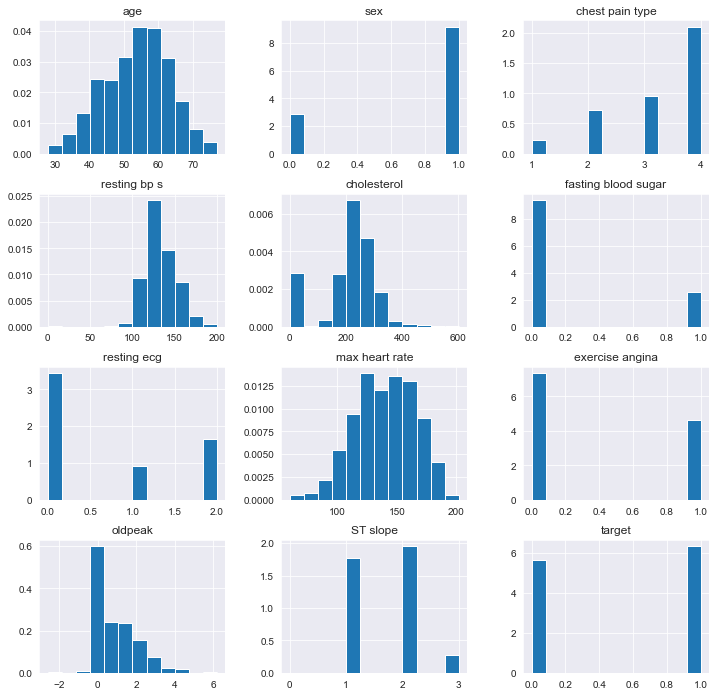

In [6]:
# A General overview of the dataset

data.hist(bins=12, figsize=(12,12),density=True)
plt.show()

### Unique Values

In [4]:
# Distinct values dictionary to map column names to unique values
# This can help with encoding downstream. For example, no need to one-hot encode binary nominal features 

{column: len(data[column].unique())for column in data.columns}

{'age': 50,
 'sex': 2,
 'chest pain type': 4,
 'resting bp s': 67,
 'cholesterol': 222,
 'fasting blood sugar': 2,
 'resting ecg': 3,
 'max heart rate': 119,
 'exercise angina': 2,
 'oldpeak': 53,
 'ST slope': 4,
 'target': 2}

# Feature selection

### Split dataset

In [63]:
 # Split df into X and y
y = data['target'].copy()
X = data.drop('target', axis=1).copy()

In [64]:
columns = X.columns
print('X shape',X.shape)

X shape (1190, 11)


In [65]:
y

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1190, dtype: int64

### Univariate Selection

The following example uses the chi-squared (chi2) statistical test for non-negative features to select the best features from the Dataset.

### Tree based importances

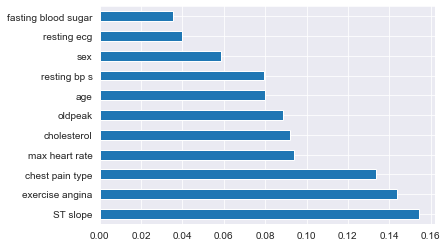

In [8]:
# Extra trees classifier of feature importances

model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_)


feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

## Low varience filtering

Varience

age                       87.575960
sex                        0.180527
chest pain type            0.875124
resting bp s             337.413674
cholesterol            10286.115598
fasting blood sugar        0.168028
resting ecg                0.757525
max heart rate           651.149724
exercise angina            0.237520
oldpeak                    1.180129
ST slope                   0.372660
dtype: float64



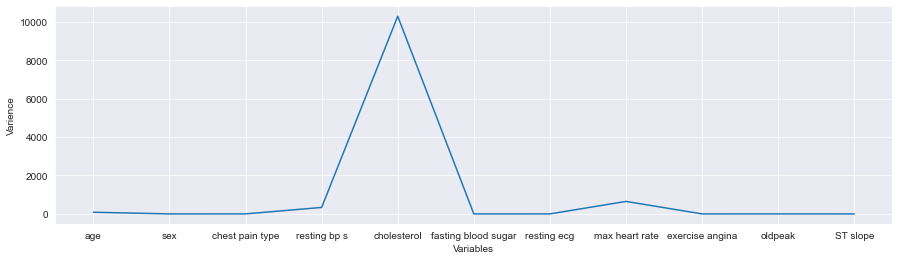

In [66]:
# Dataset variences

variance = X.var()

print('Varience')
print()
print(X.var())

print()

plt.figure(figsize= (15,4))
plt.xlabel('Variables')
plt.ylabel('Varience')
plt.plot(variance)

###  Variables with variance more than the threshold value

In [67]:
# Save variables having variance more than the threshold value
# In this case all original variable are retained

variable = [ ]

for i in range(0,len(variance)):
    if variance[i]>=0.006: #setting the threshold
        variable.append(columns[i])
        
variable

['age',
 'sex',
 'chest pain type',
 'resting bp s',
 'cholesterol',
 'fasting blood sugar',
 'resting ecg',
 'max heart rate',
 'exercise angina',
 'oldpeak',
 'ST slope']

### New dataframe using the above variables

In [68]:
# creating a new dataframe using the above variables

new_data = X[variable]
print('new_data shape',new_data.shape)
new_data.head()

new_data shape (1190, 11)


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,2,140,289,0,0,172,0,0.0,1
1,49,0,3,160,180,0,0,156,0,1.0,2
2,37,1,2,130,283,0,1,98,0,0.0,1
3,48,0,4,138,214,0,0,108,1,1.5,2
4,54,1,3,150,195,0,0,122,0,0.0,1


age                       87.575960
sex                        0.180527
chest pain type            0.875124
resting bp s             337.413674
cholesterol            10286.115598
fasting blood sugar        0.168028
resting ecg                0.757525
max heart rate           651.149724
exercise angina            0.237520
oldpeak                    1.180129
ST slope                   0.372660
dtype: float64



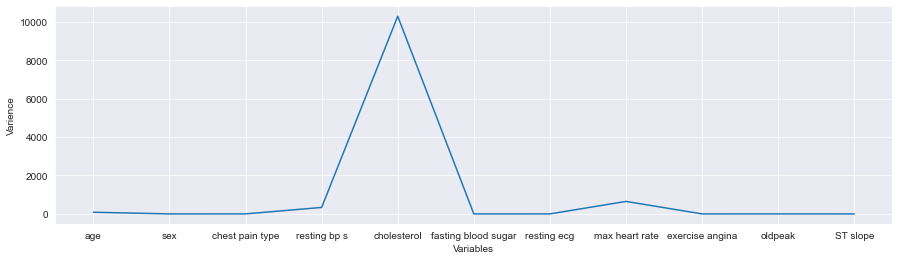

In [69]:
# Data variences

new_data_var = new_data.var()
print(new_data_var)

print()

plt.figure(figsize= (15,4))
plt.xlabel('Variables')
plt.ylabel('Varience')
plt.plot(new_data_var)

No change from original dataset with selected threshold

## Variable Encoding

In [70]:
# One Hot Encoding
# used for larger dataset

def onehot_encode(X, column_dict):
    X = new_data.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(X[column], prefix=prefix)
        X = pd.concat([X, dummies], axis=1)
        X = X.drop(column, axis=1)
        
    return X


# Encoding

def preprocess_inputs(X): #, scaler
    X = new_data.copy()
    
    # One-hot encode the nominal features
    
    nominal_features = ['chest pain type','resting ecg','ST slope']
    X = onehot_encode(X, dict(zip(nominal_features, ['CPType','ECG','SLP'])))
    
       
    return X

In [71]:
# Check Encoded feature 

X = preprocess_inputs(new_data)
print(X.shape)
X

(1190, 19)


,age,sex,resting bp s,cholesterol,fasting blood sugar,max heart rate,exercise angina,oldpeak,CPType_1,CPType_2,CPType_3,CPType_4,ECG_0,ECG_1,ECG_2,SLP_0,SLP_1,SLP_2,SLP_3
0,40,1,140,289,0,172,0,0.0,0,1,0,0,1,0,0,0,1,0,0
1,49,0,160,180,0,156,0,1.0,0,0,1,0,1,0,0,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,1,0,0,1,0,0
3,48,0,138,214,0,108,1,1.5,0,0,0,1,1,0,0,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,110,264,0,132,0,1.2,1,0,0,0,1,0,0,0,0,1,0
1186,68,1,144,193,1,141,0,3.4,0,0,0,1,1,0,0,0,0,1,0
1187,57,1,130,131,0,115,1,1.2,0,0,0,1,1,0,0,0,0,1,0
1188,57,0,130,236,0,174,0,0.0,0,1,0,0,0,0,1,0,0,1,0


In [72]:
y.shape

(1190,)

### Class distributions

In [73]:
#Class distributions

# label encode the target variable
y = LabelEncoder().fit_transform(y)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=561 (47.143%)
Class=1, n=629 (52.857%)


### Synthetic Minority Oversampling Technique
Optional: classes are fairly well distributed

In [ ]:
#SMOTE

# label encode the target variable
#y = LabelEncoder().fit_transform(y)

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

# Neural Network Definition and Training

In [74]:
# For class label mapping

class_label = {
    0: 'No Heart Disease',
    1: 'Heart Disease'
}

### Train Test Split

In [75]:
# Using 80% for training and 20% for testing

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.9,random_state=42)

print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)
print('y_train shape:',y_train.shape)
print()

n_cols=X_train.shape[1]
print('Columns ',n_cols)

X_train shape: (1071, 19)
X_test shape: (119, 19)
y_test shape: (119,)
y_train shape: (1071,)

Columns  19


### Scaling

In [76]:
# Scaling options: StandardScaler, MinMaxScaler, RobustScaler

#scaler = StandardScaler()
scaler = MinMaxScaler()
#scaler = RobustScaler()



# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
X_train = np.asarray(X_train,dtype=np.float32)
y_train = np.asarray(y_train,dtype=np.float32)
X_test = np.asarray(X_test,dtype=np.float32)
y_test = np.asarray(y_test,dtype=np.float32)

### Baseline Model Definition

In [119]:
# Code to delete a directory if used previously

#import shutil

shutil.rmtree('model.weights.bestAcc.hd5', ignore_errors=True)
shutil.rmtree('model.weights.bestLoss.hdf5', ignore_errors=True)

ERROR! Session/line number was not unique in database. History logging moved to new session 3737


In [120]:
# Baseline NN -- (Test batch sizes i.e. 64 and epochs start at 2k+)

# Test on Batch Gradient Descent: batch_size=len(X_trian)
# Stochastic Gradient Descent: batch_size=1
# Best is batch_size=240, epochs=2250


batch_size = 256 
num_classes = 2 
epochs = 500
es = EarlyStopping(monitor='val_loss', mode='auto', patience=20,restore_best_weights=True,
                   verbose=1)
cpt = ModelCheckpoint(filepath= 'model.weights.bestLoss.hdf5',monitor='val_loss',
                      verbose=1,save_best_only=True,mode='min')
cpt2 = ModelCheckpoint(filepath= 'model.weights.bestAcc.hdf5',monitor='val_accuracy',
                      verbose=1,save_best_only=True,mode='max')


#lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#    initial_learning_rate=1e-2,
#    decay_steps=10000,
#    decay_rate=0.9)
#optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)


def create_baseline():
    # Create model
    model = Sequential()
    model.add(Dense(72, input_dim=(n_cols), activation='relu'))
    model.add(Dense(2, activation='softmax'))#sigmoid
    
    
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])#binary_crossentropy    
    return model

model = create_baseline()
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 72)                1440      
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 146       
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
_________________________________________________________________


In [121]:
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, 
                            epochs=epochs, batch_size=batch_size, 
                            verbose=1)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

results = cross_val_score(estimator, X_train, y_train, cv=kfold, n_jobs=-1)

In [122]:
print("Baseline Model: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline Model: 86.84% (2.08%)


### Model fitting

###  To remove any saved models if run before

## Models from saved weights

### Save best loss model

In [171]:
# Monitoring loss

model.load_weights('model.weights.bestLoss.hdf5')
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

score = model.evaluate(X_test, y_test, verbose=0)

save_path = "HeartDis_bestLossNN_model.%s.h5" % (score[1].round(3))
model.save(save_path)

print("Created model and loaded weights from file")
print()
print("%s: %.2f%%" % ('Test Accuracy',score[1]*100))

Created model and loaded weights from file

Test Accuracy: 91.60%


### Display best loss model

In [172]:
ls -ltr HeartDis_bestLossNN_*

 Volume in drive C is Windows
 Volume Serial Number is 901D-281F

 Directory of C:\Users\celie


 Directory of C:\Users\celie

03/10/2022  03:40 PM            20,040 HeartDis_bestLossNN_model.0.916.h5
               1 File(s)         20,040 bytes
               0 Dir(s)  70,497,939,456 bytes free


### Call loss model

In [173]:
# Load the model 

NewHeart_model = keras.models.load_model('HeartDis_bestLossNN_model.0.916.h5')

NewHeart_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 72)                1440      
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 146       
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
_________________________________________________________________


### Save best accuracy model

In [174]:
# Monitoring accuracy

model.load_weights('model.weights.bestAcc.hdf5')
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

score = model.evaluate(X_test, y_test, verbose=0)

save_path = "HeartDis_bestAccNN_model.%s.h5" % (score[1].round(3))
model.save(save_path)

print("Created model and loaded weights from file")
print()
print("%s: %.2f%%" % ('Test Accuracy',score[1]*100))

Created model and loaded weights from file

Test Accuracy: 91.60%


### Display best accuracy model

In [175]:
ls -ltr HeartDis_bestAccNN_*

 Volume in drive C is Windows
 Volume Serial Number is 901D-281F

 Directory of C:\Users\celie


 Directory of C:\Users\celie

03/10/2022  03:40 PM            20,040 HeartDis_bestAccNN_model.0.916.h5
               1 File(s)         20,040 bytes
               0 Dir(s)  70,497,906,688 bytes free


### Call accuracy model

In [ ]:
# Load the model

NewHeart2_model = keras.models.load_model('HeartDis_bestAccNN_model.0.916.h5')

NewHeart2_model.summary()

### Model fitting summary

Loss

In [180]:
# Model fitting summary loss

score = NewHeart_model.evaluate(X_test, y_test, verbose=0)    
prediction_bl = NewHeart_model.predict_classes(X_test)
prediction_bl2 = NewHeart_model .predict_classes(X_train)

print(NewHeart_model.summary())
print()

# Matthews correlation coefficinet

bl_mcc_test = matthews_corrcoef(y_test,prediction_bl)
print('Matthews correlation coefficient on test:',bl_mcc_test.round(3))
print()

print('train samples:', X_train.shape[0])
print('test samples:', X_test.shape[0])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 72)                1440      
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 146       
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
_________________________________________________________________
None

Matthews correlation coefficient on test: 0.832

train samples: 1071
test samples: 119
Test loss: 0.27600983361236187
Test accuracy: 0.9159664


### Model fitting summary

Accuracy

In [178]:
# Model fitting summary accuracy

score = NewHeart2_model.evaluate(X_test, y_test, verbose=0)    
prediction_bl = NewHeart2_model.predict_classes(X_test)
prediction_bl2 = NewHeart2_model .predict_classes(X_train)

print(model.summary())
print()

# Matthews correlation coefficinet

bl_mcc_test = matthews_corrcoef(y_test,prediction_bl)
print('Matthews correlation coefficient on test:',bl_mcc_test.round(3))
print()

print('train samples:', X_train.shape[0])
print('test samples:', X_test.shape[0])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 72)                1440      
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 146       
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
_________________________________________________________________
None

Matthews correlation coefficient on test: 0.832

train samples: 1071
test samples: 119
Test loss: 0.2699853860530533
Test accuracy: 0.9159664


### Classification report

In [181]:
print(classification_report(y_test.astype(int), prediction_bl))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        47
           1       0.97      0.89      0.93        72

    accuracy                           0.92       119
   macro avg       0.91      0.92      0.91       119
weighted avg       0.92      0.92      0.92       119



### Confusion matrix

Text(0.5, 16.0, 'Predicted Class')

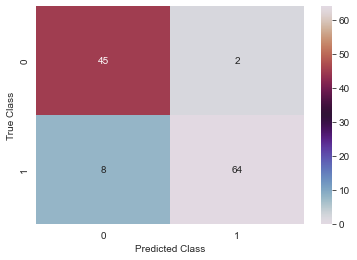

In [182]:
cm = confusion_matrix(y_test,prediction_bl)
#plt.figure(figsize=(10, 10))
sns.heatmap(cm,annot=True, fmt='g', vmin=0, cbar=True, cmap='twilight')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

### Performanc metrics from the confusion matrix

In [183]:
#Performance metrics from confusion matrix 

FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, Recall, or true positive rate
TPR = TP/(TP+FN)

# Specificity or true negative rate
TNR = TN/(TN+FP) 

# Precision or positive predictive value
PPV = TP/(TP+FP)

# Negative predictive value
NPV = TN/(TN+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

# False negative rate
FNR = FN/(TP+FN)

# False discovery rate
FDR = FP/(TP+FP)


print('Class:',class_label)

print('Specificity:',TNR)
print('Specificity Mean:',TNR.mean())

print()

print('Class:',class_label)

print('Recall/Sensitivity:',TPR)
print('Recall/Sensitivity Mean:',TPR.mean())

print()

print('Class:',class_label)

print('Precision:',PPV)
print('Precision Mean:',PPV.mean())

print()

print('Class:',class_label)

print('False Positive Rate:',FPR)
print('False Positive Rate Mean:',FPR.mean())

print()

print('Class:',class_label)

print('False Negative Rate:',FNR)
print('False Negative Rate Mean:',FNR.mean())

print()

print('Class:',class_label)

print('False Discovery Rate:',FDR)
print('False Discovery Rate Mean:',FDR.mean())

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Specificity: [0.88888889 0.95744681]
Specificity Mean: 0.9231678486997636

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Recall/Sensitivity: [0.95744681 0.88888889]
Recall/Sensitivity Mean: 0.9231678486997636

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Precision: [0.8490566  0.96969697]
Precision Mean: 0.9093767867352773

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Positive Rate: [0.11111111 0.04255319]
False Positive Rate Mean: 0.0768321513002364

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Negative Rate: [0.04255319 0.11111111]
False Negative Rate Mean: 0.0768321513002364

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Discovery Rate: [0.1509434  0.03030303]
False Discovery Rate Mean: 0.0906232132647227


### Training and Testing Histories

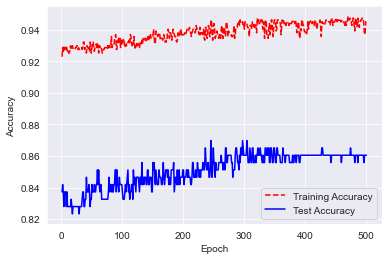

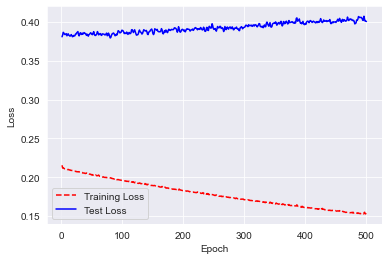

In [184]:
#Get training and test accuracy histories
training_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

#Epoch count
epoch_count = range(1,len(training_accuracy) + 1)

#plt.figure(figsize=(8, 6))
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count,test_accuracy, "b-")
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

#Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']


#Epoch count
epoch_count = range(1,len(training_loss) + 1)

#Visualize loss history
#plt.figure(figsize=(8, 6))
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count,test_loss, "b-")
plt.legend(['Training Loss','Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### ROC - AUC Plot and Score


Heart Disease: ROC-AUC Score: = 0.959



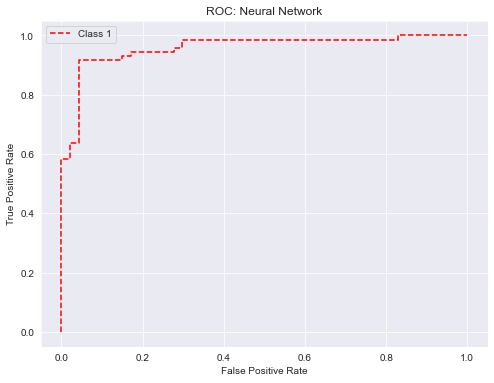

In [185]:
#ROC Plot
#from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

prediction_cplx = model.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prediction_cplx[:,-1], pos_label=i)

#y_score = classifier.fit(X_train, y_train).decision_function(X_test)
#See machinelearningmastery
# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])  
ns_probs=[0 for _ in range(len(y_test))]
lr_probs=model.predict_proba(X_test)
lr_probs=lr_probs[:,-1]
ns_auc=roc_auc_score(y_test,ns_probs)
lr_auc=roc_auc_score(y_test,lr_probs)
#print('No Heart Disease:ROC AUC=%.3f'%(ns_auc))
print()
print('Heart Disease: ROC-AUC Score: = %.3f'%(lr_auc))
print()
    
# plotting
plt.figure(figsize=(8, 6))
#plt.plot(fpr[0], tpr[0], linestyle='--',color='steelblue', label='Class 0')
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Class 1')
#plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
#plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
#plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')
#plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='Class 5 vs Rest')
#plt.plot(fpr[6], tpr[6], linestyle='--',color='yellow', label='Class 6 vs Rest')
plt.title('ROC: Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
#plt.savefig('RF ROC',dpi=300)

## Predictions and Confidences
 ### Classes and Probabilities

In [186]:
# Classes and Probabilities

prediction_probability = model.predict_proba(X_test)
prediction_cplx = model.predict_classes(X_test)

class_df = pd.DataFrame(prediction_cplx.round(3),columns=['Predicted class'])
proba_df = pd.DataFrame(prediction_probability.round(3),columns=['No heart disease','Heart disease'])

#pred_list = pd.concat(['frame','target_rs'],axis= 1)


predictions_df = pd.concat([proba_df,class_df ], axis=1)
predictions_df.head()

,No heart disease,Heart disease,Predicted class
0,0.010,0.990,1
1,0.437,0.563,1
2,0.994,0.006,0
3,0.005,0.995,1
4,0.530,0.470,0


### Index of  incorrect predictions

In [187]:
# Incorrect predictions

incorrects = np.nonzero(prediction_cplx.reshape((-1,)) != y_test)
incorrects

(array([  4,  18,  30,  40,  60,  76,  97, 101, 104, 109], dtype=int64),)

### Jaccard similarity coefficient

In [188]:
# Jaccard similarity coefficient
# Predicted class compared with actual class

jaccard = jaccard_score(y_test, prediction_cplx, average = None)#prediction_probability

jaccard_df = pd.DataFrame(jaccard,columns=['Jaccard score'])
jaccard_df

,Jaccard score
0,0.818182
1,0.864865


## Confidence interval

The confidence interval is a likelihood over a range. The true model skill may lie outside of this range.
 
**Commonly used number of standard deviations from the Gaussian distribution and their corresponding significance level are as follows:**

* 1.64 (90%)
* 1.96 (95%)
* 2.33 (98%)
* 2.58 (99%)

### Using model error

In [189]:
# 95% confidence interval
# Calculated radius of the confidence interval using model error

# where: interval = z * sqrt( (error * (1 - error)) / n)

interval = 1.96 * sqrt( (0.08 * (1 - .08)) / 119)
print('Classification error interval: %.3f' % interval)

Classification error interval: 0.049


* The classification error of the model is 8% +/- 5%
* The true classification error of the model on unseen data is likely between 3% and 13%.
 
 **The true model skill may lie outside of this range.**

### Upper and lower bounds of model classification accuracy

In [190]:
# Upper and lower bounds of model accuracy

# 218 correct predictions of 238 instances and with 95% confidence interval,
# (provided to the function as a significance of 0.05)

lower, upper = proportion_confint(109, 119, 0.05)

print('Lower Bounds of Accuracy:%.3f ' % lower)
print('Upper Bounds of Accuracy:%.3f ' %upper)

Lower Bounds of Accuracy:0.866 
Upper Bounds of Accuracy:0.966 


 **The true classification accuracy of the model on unseen data is likely between 87% and 97%**.

 **True model skill may lie outside of this range.**

# Increase in Neural Network Size

In [96]:
# Code to delete a directory if used previously

#import shutil

shutil.rmtree('model.weights.bestAccCpx.hd5', ignore_errors=True)
shutil.rmtree('model.weights.bestLossCpx.hdf5', ignore_errors=True)

In [104]:
# Increase in model complexity

batch_size = 256 
num_classes = 2 
epochs = 500
es = EarlyStopping(monitor='val_loss', mode='auto', patience=20,restore_best_weights=True,
                   verbose=1)
cpt = ModelCheckpoint(filepath= 'model.weights.bestLossCpx.hdf5',monitor='val_loss',
                      verbose=1,save_best_only=True,mode='min')
cpt2 = ModelCheckpoint(filepath= 'model.weights.bestAccCpx.hdf5',monitor='val_accuracy',
                      verbose=1,save_best_only=True,mode='max')


#lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#    initial_learning_rate=1e-2,
#    decay_steps=10000,
#    decay_rate=0.9)
#optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

def create_cplx():
    # Create model
    model = Sequential()
    model.add(Dense(72, input_dim=(n_cols),kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.002), activation='relu'))
    model.add(Dense(64,kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.002),activation='relu'))
    model.add(Dense(24,kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.002),activation='relu'))
    #model.add(Dense(24,kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.002), activation='relu'))
    #model.add(Dense(24, activation='relu'))
    #model.add(Dropout(0.20))
    model.add(Dense(2, activation='softmax'))#sigmoid
    
    
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])#binary_crossentropy    
    return model

model = create_cplx()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 72)                1440      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4672      
_________________________________________________________________
dense_20 (Dense)             (None, 24)                1560      
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 50        
Total params: 7,722
Trainable params: 7,722
Non-trainable params: 0
_________________________________________________________________


### Cross validation

In [98]:
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_cplx, 
                            epochs=epochs, batch_size=batch_size, 
                            verbose=1)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

results = cross_val_score(estimator, X_train, y_train, cv=kfold, n_jobs=-1)

In [99]:
print("Larger Model: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Larger Model: 84.50% (2.99%)


### Model fitting

In [105]:
# Fit model

history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[cpt,cpt2],#[es]
                    verbose=2,
                    validation_split=0.2 ) #validation_split=0.2

Train on 856 samples, validate on 215 samples
Epoch 1/500



Epoch 00001: val_accuracy improved from -inf to 0.73023, saving model to model.weights.bestAccCpx.hdf5
856/856 - 2s - loss: 2.6492 - accuracy: 0.5970 - val_loss: 2.5834 - val_accuracy: 0.7302
Epoch 2/500

Epoch 00002: val_accuracy improved from 0.73023 to 0.74884, saving model to model.weights.bestAccCpx.hdf5
856/856 - 0s - loss: 2.5425 - accuracy: 0.7629 - val_loss: 2.4931 - val_accuracy: 0.7488
Epoch 3/500

Epoch 00003: val_accuracy improved from 0.74884 to 0.77674, saving model to model.weights.bestAccCpx.hdf5
856/856 - 0s - loss: 2.4492 - accuracy: 0.7956 - val_loss: 2.4061 - val_accuracy: 0.7767
Epoch 4/500

Epoch 00004: val_accuracy improved from 0.77674 to 0.79535, saving model to model.weights.bestAccCpx.hdf5
856/856 - 0s - loss: 2.3605 - accuracy: 0.8166 - val_loss: 2.3203 - val_accuracy: 0.7953
Epoch 5/500

Epoch 00005: val_accuracy improved from 0.79535 to 0.80465, saving model to model.weights.bestAccCpx.hdf5
856/856 - 0s - loss: 2.2750 - accuracy: 0.8236 - val_loss: 2.240

## Models from saved weights

In [ ]:
# To remove any models if run before 
## Note the saved path before running to avoid disaster!

!rm -f HeartDis_bestLossCpx_*
!rm -f HeartDis_bestAccCpx_*

### Save best loss model

In [101]:
# Monitoring loss

model.load_weights('model.weights.bestLossCpx.hdf5')
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

save_path = "HeartDis_bestLossCpx_model.%s.h5" % (score[1].round(3))
model.save(save_path)


score = model.evaluate(X_test, y_test, verbose=0)
print("Created model and loaded weights from file")
print()
print("%s: %.2f%%" % ('Test Accuracy',score[1]*100))

Created model and loaded weights from file

Test Accuracy: 89.92%


### Display best loss model

In [ ]:
ls -ltr HeartDis_bestLossCpx_*

### Call loss model

In [ ]:
# Load the model 

NewHeartCpx_model = keras.models.load_model('HeartDis_bestLossCpx_model.0.916.h5')

NewHeartCpx_model.summary()

## Save best accuracy model

In [106]:
# Monitoring accuracy

model.load_weights('model.weights.bestAccCpx.hdf5')
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

save_path = "HeartDis_bestAccCpx_model.%s.h5" % (score[1].round(3))
model.save(save_path)


score = model.evaluate(X_test, y_test, verbose=0)
print("Created model and loaded weights from file")
print()
print("%s: %.2f%%" % ('Test Accuracy',score[1]*100))

Created model and loaded weights from file

Test Accuracy: 92.44%


### Display best accuracy model

In [ ]:
ls -ltr HeartDis_bestAccCpx_*

### Call accuracy model

In [ ]:
# Load the model 

NewHeartCpx2_model = keras.models.load_model('HeartDis_bestAccCpx_model.0.916.h5')

NewHeartCpx2_model.summary()

### Model fitting summary

Loss

In [102]:
# Model fitting summary loss

score = NewHeartCpx_model.evaluate(X_test, y_test, verbose=0)    
prediction_cplx = NewHeartCpx_model.predict_classes(X_test)
print()


print(NewHeartCpx_model.summary())
print()

# Matthews correlation

mcc_test = matthews_corrcoef(y_test,prediction_cplx)
print('Matthews correlation coefficient on test:',mcc_test.round(3))
print()

print('train samples:', X_train.shape[0])
print('test samples:', X_test.shape[0])
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 72)                1440      
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4672      
_________________________________________________________________
dense_16 (Dense)             (None, 24)                1560      
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 50        
Total params: 7,722
Trainable params: 7,722
Non-trainable params: 0
_________________________________________________________________
None

Matthews correlation coefficient on test: 0.794

train samples: 1071
test samples: 119
Test loss: 0.3323238101326117
Test accuracy: 0.89915967


### Model fitting summary

Accuracy

In [107]:
# Model fitting summary accuracy

score = NewHeartCpx2_model.evaluate(X_test, y_test, verbose=0)    
prediction_cplx = NewHeartCpx2_model.predict_classes(X_test)
print()


print(NewHeartCpx2_model.summary())
print()

# Matthews correlation

mcc_test = matthews_corrcoef(y_test,prediction_cplx)
print('Matthews correlation coefficient on test:',mcc_test.round(3))
print()

print('train samples:', X_train.shape[0])
print('test samples:', X_test.shape[0])
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 72)                1440      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4672      
_________________________________________________________________
dense_20 (Dense)             (None, 24)                1560      
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 50        
Total params: 7,722
Trainable params: 7,722
Non-trainable params: 0
_________________________________________________________________
None

Matthews correlation coefficient on test: 0.845

train samples: 1071
test samples: 119
Test loss: 0.3341517919251899
Test accuracy: 0.92436975


### Classification report

In [108]:
print(classification_report(y_test.astype(int), prediction_cplx))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        47
           1       0.96      0.92      0.94        72

    accuracy                           0.92       119
   macro avg       0.92      0.93      0.92       119
weighted avg       0.93      0.92      0.92       119



### Confusion matrix

Text(0.5, 16.0, 'Predicted Class')

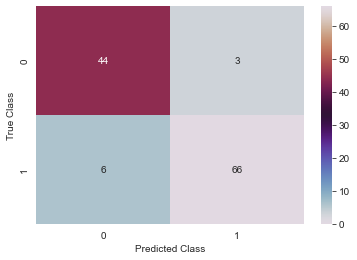

In [109]:
cm = confusion_matrix(y_test,prediction_cplx)
#plt.figure(figsize=(10, 10))
sns.heatmap(cm,annot=True, fmt='g', vmin=0, cbar=True, cmap='twilight')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

### Performanc metrics from the confusion matrix

In [110]:
#Performance metrics from confusion matrix 

FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, Recall, or true positive rate
TPR = TP/(TP+FN)

# Specificity or true negative rate
TNR = TN/(TN+FP) 

# Precision or positive predictive value
PPV = TP/(TP+FP)

# Negative predictive value
NPV = TN/(TN+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

# False negative rate
FNR = FN/(TP+FN)

# False discovery rate
FDR = FP/(TP+FP)


print('Class:',class_label)

print('Specificity:',TNR)
print('Specificity Mean:',TNR.mean())

print()

print('Class:',class_label)

print('Recall/Sensitivity:',TPR)
print('Recall/Sensitivity Mean:',TPR.mean())

print()

print('Class:',class_label)

print('Precision:',PPV)
print('Precision Mean:',PPV.mean())

print()

print('Class:',class_label)

print('False Positive Rate:',FPR)
print('False Positive Rate Mean:',FPR.mean())

print()

print('Class:',class_label)

print('False Negative Rate:',FNR)
print('False Negative Rate Mean:',FNR.mean())

print()

print('Class:',class_label)

print('False Discovery Rate:',FDR)
print('False Discovery Rate Mean:',FDR.mean())

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Specificity: [0.91666667 0.93617021]
Specificity Mean: 0.926418439716312

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Recall/Sensitivity: [0.93617021 0.91666667]
Recall/Sensitivity Mean: 0.926418439716312

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Precision: [0.88       0.95652174]
Precision Mean: 0.9182608695652175

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Positive Rate: [0.08333333 0.06382979]
False Positive Rate Mean: 0.07358156028368794

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Negative Rate: [0.06382979 0.08333333]
False Negative Rate Mean: 0.07358156028368794

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Discovery Rate: [0.12       0.04347826]
False Discovery Rate Mean: 0.0817391304347826


### Training and Testing Histories

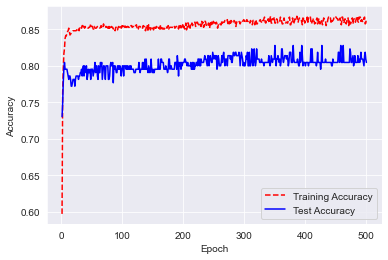

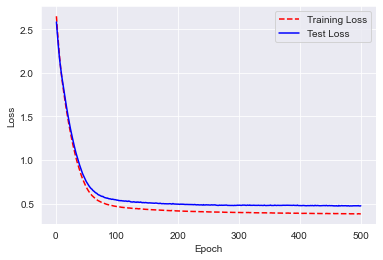

In [111]:
#Get training and test accuracy histories
training_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

#Epoch count
epoch_count = range(1,len(training_accuracy) + 1)

#plt.figure(figsize=(8, 6))
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count,test_accuracy, "b-")
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

#Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']


#Epoch count
epoch_count = range(1,len(training_loss) + 1)

#Visualize loss history
#plt.figure(figsize=(8, 6))
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count,test_loss, "b-")
plt.legend(['Training Loss','Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### ROC - AUC Plot and Score


Heart Disease: ROC-AUC Score: = 0.954



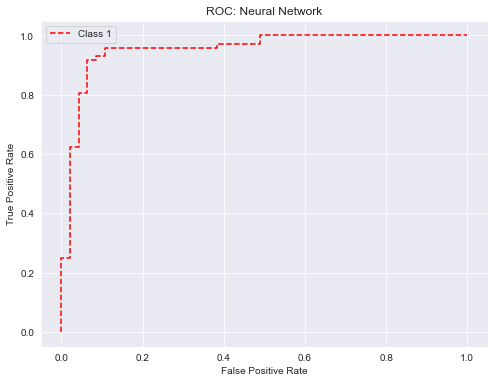

In [112]:
#ROC Plot
#from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

prediction_cplx = model.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prediction_cplx[:,-1], pos_label=i)

#y_score = classifier.fit(X_train, y_train).decision_function(X_test)
#See machinelearningmastery
# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])  
ns_probs=[0 for _ in range(len(y_test))]
lr_probs=model.predict_proba(X_test)
lr_probs=lr_probs[:,-1]
ns_auc=roc_auc_score(y_test,ns_probs)
lr_auc=roc_auc_score(y_test,lr_probs)
#print('No Heart Disease:ROC AUC=%.3f'%(ns_auc))
print()
print('Heart Disease: ROC-AUC Score: = %.3f'%(lr_auc))
print()
    
# plotting
plt.figure(figsize=(8, 6))
#plt.plot(fpr[0], tpr[0], linestyle='--',color='steelblue', label='Class 0')
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Class 1')
#plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
#plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
#plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')
#plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='Class 5 vs Rest')
#plt.plot(fpr[6], tpr[6], linestyle='--',color='yellow', label='Class 6 vs Rest')
plt.title('ROC: Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
#plt.savefig('RF ROC',dpi=300)

## Predictions and Confidences
 **Classes and Probabilities**

In [113]:
# Classes and Probabilities

prediction_probability = model.predict_proba(X_test)
prediction_cplx = model.predict_classes(X_test)

class_df = pd.DataFrame(prediction_cplx.round(3),columns=['Predicted class'])
proba_df = pd.DataFrame(prediction_probability.round(3),columns=['No heart disease','Heart disease'])

#pred_list = pd.concat(['frame','target_rs'],axis= 1)


predictions_df = pd.concat([proba_df,class_df ], axis=1)
predictions_df

,No heart disease,Heart disease,Predicted class
0,0.068,0.932,1
1,0.241,0.759,1
2,0.986,0.014,0
3,0.042,0.958,1
4,0.433,0.567,1
...,...,...,...
114,0.054,0.946,1
115,0.144,0.856,1
116,0.061,0.939,1
117,0.968,0.032,0


### Index of  incorrect predictions

In [114]:
# Incorrect predictions

incorrects = np.nonzero(prediction_cplx.reshape((-1,)) != y_test)
incorrects

(array([ 11,  18,  40,  42,  60,  63,  76,  97, 101], dtype=int64),)

### Jaccard similarity coefficient

In [115]:
# Jaccard similarity coefficient
# Predicted class compared with actual class


jaccard = jaccard_score(y_test, prediction_cplx, average = None)

jaccard_df = pd.DataFrame(jaccard,columns=['Jaccard score'])
jaccard_df

,Jaccard score
0,0.830189
1,0.880000


## Confidence interval

The confidence interval is a likelihood over a range. The true model skill may lie outside of this range.
 
**Commonly used number of standard deviations from the Gaussian distribution and their corresponding significance level are as follows:**

* 1.64 (90%)
* 1.96 (95%)
* 2.33 (98%)
* 2.58 (99%)

### Using model error

In [116]:
# 95% confidence interval
# Calculated radius of the confidence interval using model error

# where: interval = z * sqrt( (error * (1 - error)) / n)

interval = 1.96 * sqrt( (0.08 * (1 - .08)) / 119)
print('Classification error interval: %.3f' % interval)

Classification error interval: 0.049


* The classification error of the model is 8% +/- 5%
* The true classification error of the model on unseen data is likely between 3% and 13%.
 
 **The true model skill may lie outside of this range.**


### Upper and lower bounds of model classification accuracy

 **The true classification accuracy of the model on unseen data is likely between 88% and 97%**.

 **True model skill may lie outside of this range.**

#  2. Model Tuning and Evaluation

### Grid Search
#### Tuning  a neural net model 

Searching through activation functions and optimizers comparing the results with the best peforming model from the model definition and training phase.

Since no significant differance is noted, the simpler, less computationally expensive model is used.

**________________________________________________________________________________________________________**

**Use code below to remove saved models if run before.**

**Note the saved path to avoid unintentionally deleting valuable models.**

#### Parameter grid for tuning neural network

In [52]:
#define parameter grid

batch_size = 256
num_classes = 2 
epochs = 500 #675
es = EarlyStopping(monitor='val_loss', mode='auto', patience=10, restore_best_weights=True,
 verbose=1)

activation_functions_layer_1 = ['selu','relu','elu','tanh'] 
#activation_functions_layer_2 = ['selu','relu','elu','tanh']
#activation_functions_layer_3 = ['selu','relu','elu','tanh']
opimizers = ['RMSprop','adam','nadam','sgd']

#optimize over parameter grid (grid search)

for activation_function_layer_1 in activation_functions_layer_1:
    #for activation_function_layer_2 in activation_functions_layer_2:
     #   for activation_function_layer_3 in activation_functions_layer_3:
            for opimizer in opimizers:
                
    
        
            
                model = Sequential()
                model.add(Dense(72, activation = activation_function_layer_1, input_shape=(n_cols,)))               
                #model.add(Dense(64,kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.002), activation=activation_function_layer_1))
                #model.add(Dense(24,kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.002), activation=activation_function_layer_1))
                #model.add(Dropout(0.20))
                model.add(Dense(num_classes, activation='softmax'))
            
            
                model.compile(loss='sparse_categorical_crossentropy',
                              optimizer=opimizer,
                              metrics=['accuracy'])

                history = model.fit(X_train, y_train, 
                batch_size=batch_size,
                epochs=epochs,
                callbacks=[es],        
                verbose=1,
                validation_data=(X_test, y_test))
        
                score = model.evaluate(X_test, y_test, verbose=0)
                save_path = "ker33_Test_tuned_HeartDis_model.%s.%s.%s.h5" % (activation_function_layer_1,opimizer,score[1].round(3))
            
                model.save(save_path)

Train on 1071 samples, validate on 119 samples
Epoch 1/500


1071/1071 [==============================] - 1s 893us/sample - loss: 0.7805 - accuracy: 0.5490 - val_loss: 0.5953 - val_accuracy: 0.7059
Epoch 2/500
1071/1071 [==============================] - 0s 66us/sample - loss: 0.6013 - accuracy: 0.7031 - val_loss: 0.5063 - val_accuracy: 0.8235
Epoch 3/500
1071/1071 [==============================] - 0s 54us/sample - loss: 0.5277 - accuracy: 0.7740 - val_loss: 0.4574 - val_accuracy: 0.8487
Epoch 4/500
1071/1071 [==============================] - 0s 49us/sample - loss: 0.4835 - accuracy: 0.8049 - val_loss: 0.4069 - val_accuracy: 0.8739
Epoch 5/500
1071/1071 [==============================] - 0s 49us/sample - loss: 0.4556 - accuracy: 0.8226 - val_loss: 0.3866 - val_accuracy: 0.8655
Epoch 6/500
1071/1071 [==============================] - 0s 56us/sample - loss: 0.4330 - accuracy: 0.8235 - val_loss: 0.3829 - val_accuracy: 0.8487
Epoch 7/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.4178 - accuracy: 0.8273 - val_loss: 0.351

1071/1071 [==============================] - 1s 703us/sample - loss: 0.8835 - accuracy: 0.5061 - val_loss: 0.7213 - val_accuracy: 0.6134
Epoch 2/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.7452 - accuracy: 0.5257 - val_loss: 0.6332 - val_accuracy: 0.5966
Epoch 3/500
1071/1071 [==============================] - 0s 45us/sample - loss: 0.6498 - accuracy: 0.6218 - val_loss: 0.5597 - val_accuracy: 0.7731
Epoch 4/500
1071/1071 [==============================] - 0s 39us/sample - loss: 0.5783 - accuracy: 0.7778 - val_loss: 0.4938 - val_accuracy: 0.8824
Epoch 5/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.5209 - accuracy: 0.8030 - val_loss: 0.4359 - val_accuracy: 0.8739
Epoch 6/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.4790 - accuracy: 0.8133 - val_loss: 0.3962 - val_accuracy: 0.8908
Epoch 7/500
1071/1071 [==============================] - 0s 39us/sample - loss: 0.4488 - accuracy: 0.8329 - val_loss: 0.371

1071/1071 [==============================] - 2s 2ms/sample - loss: 0.7906 - accuracy: 0.4622 - val_loss: 0.7577 - val_accuracy: 0.4118
Epoch 2/500
1071/1071 [==============================] - 0s 58us/sample - loss: 0.6851 - accuracy: 0.5556 - val_loss: 0.6458 - val_accuracy: 0.5966
Epoch 3/500
1071/1071 [==============================] - 0s 66us/sample - loss: 0.6195 - accuracy: 0.6657 - val_loss: 0.5723 - val_accuracy: 0.7311
Epoch 4/500
1071/1071 [==============================] - 0s 56us/sample - loss: 0.5669 - accuracy: 0.7619 - val_loss: 0.5096 - val_accuracy: 0.8319
Epoch 5/500
1071/1071 [==============================] - 0s 56us/sample - loss: 0.5248 - accuracy: 0.7871 - val_loss: 0.4680 - val_accuracy: 0.8655
Epoch 6/500
1071/1071 [==============================] - 0s 56us/sample - loss: 0.4900 - accuracy: 0.8030 - val_loss: 0.4407 - val_accuracy: 0.8739
Epoch 7/500
1071/1071 [==============================] - 0s 73us/sample - loss: 0.4627 - accuracy: 0.8254 - val_loss: 0.4110 

1071/1071 [==============================] - 1s 788us/sample - loss: 0.7437 - accuracy: 0.4388 - val_loss: 0.6853 - val_accuracy: 0.4790
Epoch 2/500
1071/1071 [==============================] - 0s 49us/sample - loss: 0.6872 - accuracy: 0.4911 - val_loss: 0.6281 - val_accuracy: 0.6218
Epoch 3/500
1071/1071 [==============================] - 0s 56us/sample - loss: 0.6452 - accuracy: 0.5826 - val_loss: 0.5895 - val_accuracy: 0.7143
Epoch 4/500
1071/1071 [==============================] - 0s 56us/sample - loss: 0.6115 - accuracy: 0.7012 - val_loss: 0.5528 - val_accuracy: 0.8319
Epoch 5/500
1071/1071 [==============================] - 0s 56us/sample - loss: 0.5832 - accuracy: 0.7591 - val_loss: 0.5260 - val_accuracy: 0.8655
Epoch 6/500
1071/1071 [==============================] - 0s 58us/sample - loss: 0.5598 - accuracy: 0.7834 - val_loss: 0.5069 - val_accuracy: 0.8655
Epoch 7/500
1071/1071 [==============================] - 0s 64us/sample - loss: 0.5393 - accuracy: 0.7993 - val_loss: 0.486

1071/1071 [==============================] - 1s 963us/sample - loss: 0.6994 - accuracy: 0.5434 - val_loss: 0.6194 - val_accuracy: 0.7647
Epoch 2/500
1071/1071 [==============================] - 0s 58us/sample - loss: 0.6194 - accuracy: 0.7320 - val_loss: 0.5547 - val_accuracy: 0.8403
Epoch 3/500
1071/1071 [==============================] - 0s 50us/sample - loss: 0.5767 - accuracy: 0.7684 - val_loss: 0.5187 - val_accuracy: 0.8403
Epoch 4/500
1071/1071 [==============================] - 0s 58us/sample - loss: 0.5443 - accuracy: 0.7778 - val_loss: 0.4761 - val_accuracy: 0.8487
Epoch 5/500
1071/1071 [==============================] - 0s 60us/sample - loss: 0.5170 - accuracy: 0.7806 - val_loss: 0.4507 - val_accuracy: 0.8739
Epoch 6/500
1071/1071 [==============================] - 0s 55us/sample - loss: 0.4935 - accuracy: 0.7843 - val_loss: 0.4361 - val_accuracy: 0.8571
Epoch 7/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.4741 - accuracy: 0.7983 - val_loss: 0.409

1071/1071 [==============================] - 1s 871us/sample - loss: 0.8293 - accuracy: 0.5201 - val_loss: 0.7050 - val_accuracy: 0.6050
Epoch 2/500
1071/1071 [==============================] - 0s 53us/sample - loss: 0.7434 - accuracy: 0.5201 - val_loss: 0.6448 - val_accuracy: 0.6218
Epoch 3/500
1071/1071 [==============================] - 0s 61us/sample - loss: 0.6768 - accuracy: 0.5565 - val_loss: 0.5955 - val_accuracy: 0.7143
Epoch 4/500
1071/1071 [==============================] - 0s 64us/sample - loss: 0.6260 - accuracy: 0.6816 - val_loss: 0.5540 - val_accuracy: 0.8487
Epoch 5/500
1071/1071 [==============================] - 0s 49us/sample - loss: 0.5853 - accuracy: 0.7731 - val_loss: 0.5145 - val_accuracy: 0.8571
Epoch 6/500
1071/1071 [==============================] - 0s 49us/sample - loss: 0.5508 - accuracy: 0.7834 - val_loss: 0.4775 - val_accuracy: 0.8739
Epoch 7/500
1071/1071 [==============================] - 0s 66us/sample - loss: 0.5201 - accuracy: 0.8095 - val_loss: 0.445

1071/1071 [==============================] - 2s 2ms/sample - loss: 0.6986 - accuracy: 0.5135 - val_loss: 0.6452 - val_accuracy: 0.6471
Epoch 2/500
1071/1071 [==============================] - 0s 39us/sample - loss: 0.6620 - accuracy: 0.6134 - val_loss: 0.6031 - val_accuracy: 0.7479
Epoch 3/500
1071/1071 [==============================] - 0s 50us/sample - loss: 0.6262 - accuracy: 0.7049 - val_loss: 0.5643 - val_accuracy: 0.8067
Epoch 4/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.5913 - accuracy: 0.7675 - val_loss: 0.5253 - val_accuracy: 0.8319
Epoch 5/500
1071/1071 [==============================] - 0s 58us/sample - loss: 0.5590 - accuracy: 0.7880 - val_loss: 0.4917 - val_accuracy: 0.8403
Epoch 6/500
1071/1071 [==============================] - 0s 56us/sample - loss: 0.5295 - accuracy: 0.7927 - val_loss: 0.4644 - val_accuracy: 0.8487
Epoch 7/500
1071/1071 [==============================] - 0s 56us/sample - loss: 0.5026 - accuracy: 0.8002 - val_loss: 0.4373 

1071/1071 [==============================] - 1s 738us/sample - loss: 0.8088 - accuracy: 0.2521 - val_loss: 0.8073 - val_accuracy: 0.2269
Epoch 2/500
1071/1071 [==============================] - 0s 39us/sample - loss: 0.7901 - accuracy: 0.2829 - val_loss: 0.7836 - val_accuracy: 0.2605
Epoch 3/500
1071/1071 [==============================] - 0s 58us/sample - loss: 0.7729 - accuracy: 0.3035 - val_loss: 0.7638 - val_accuracy: 0.3445
Epoch 4/500
1071/1071 [==============================] - 0s 46us/sample - loss: 0.7576 - accuracy: 0.3399 - val_loss: 0.7439 - val_accuracy: 0.4454
Epoch 5/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.7430 - accuracy: 0.3856 - val_loss: 0.7267 - val_accuracy: 0.4958
Epoch 6/500
1071/1071 [==============================] - 0s 56us/sample - loss: 0.7298 - accuracy: 0.4304 - val_loss: 0.7122 - val_accuracy: 0.5210
Epoch 7/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.7173 - accuracy: 0.4837 - val_loss: 0.696

1071/1071 [==============================] - 1s 1ms/sample - loss: 0.7340 - accuracy: 0.4575 - val_loss: 0.6193 - val_accuracy: 0.6807
Epoch 2/500
1071/1071 [==============================] - 0s 85us/sample - loss: 0.6254 - accuracy: 0.7227 - val_loss: 0.5443 - val_accuracy: 0.8235
Epoch 3/500
1071/1071 [==============================] - 0s 56us/sample - loss: 0.5636 - accuracy: 0.7852 - val_loss: 0.4992 - val_accuracy: 0.8908
Epoch 4/500
1071/1071 [==============================] - 0s 56us/sample - loss: 0.5200 - accuracy: 0.8030 - val_loss: 0.4452 - val_accuracy: 0.8487
Epoch 5/500
1071/1071 [==============================] - 0s 75us/sample - loss: 0.4884 - accuracy: 0.8030 - val_loss: 0.4200 - val_accuracy: 0.8739
Epoch 6/500
1071/1071 [==============================] - 0s 66us/sample - loss: 0.4622 - accuracy: 0.8170 - val_loss: 0.4059 - val_accuracy: 0.8739
Epoch 7/500
1071/1071 [==============================] - 0s 75us/sample - loss: 0.4420 - accuracy: 0.8291 - val_loss: 0.3762 

1071/1071 [==============================] - 1s 843us/sample - loss: 0.6864 - accuracy: 0.5500 - val_loss: 0.6168 - val_accuracy: 0.7731
Epoch 2/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.6245 - accuracy: 0.7292 - val_loss: 0.5515 - val_accuracy: 0.8319
Epoch 3/500
1071/1071 [==============================] - 0s 45us/sample - loss: 0.5792 - accuracy: 0.7684 - val_loss: 0.5021 - val_accuracy: 0.8487
Epoch 4/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.5387 - accuracy: 0.7871 - val_loss: 0.4644 - val_accuracy: 0.8571
Epoch 5/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.5048 - accuracy: 0.7955 - val_loss: 0.4327 - val_accuracy: 0.8571
Epoch 6/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.4774 - accuracy: 0.8049 - val_loss: 0.4079 - val_accuracy: 0.8739
Epoch 7/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.4553 - accuracy: 0.8123 - val_loss: 0.389

1071/1071 [==============================] - 2s 2ms/sample - loss: 0.7677 - accuracy: 0.4753 - val_loss: 0.6983 - val_accuracy: 0.5294
Epoch 2/500
1071/1071 [==============================] - 0s 49us/sample - loss: 0.6851 - accuracy: 0.6172 - val_loss: 0.6139 - val_accuracy: 0.7647
Epoch 3/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.6289 - accuracy: 0.7236 - val_loss: 0.5559 - val_accuracy: 0.8571
Epoch 4/500
1071/1071 [==============================] - 0s 57us/sample - loss: 0.5844 - accuracy: 0.7750 - val_loss: 0.5063 - val_accuracy: 0.8992
Epoch 5/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.5479 - accuracy: 0.7974 - val_loss: 0.4696 - val_accuracy: 0.8992
Epoch 6/500
1071/1071 [==============================] - 0s 55us/sample - loss: 0.5165 - accuracy: 0.8049 - val_loss: 0.4429 - val_accuracy: 0.8908
Epoch 7/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.4895 - accuracy: 0.8067 - val_loss: 0.4173 

1071/1071 [==============================] - 1s 851us/sample - loss: 0.6709 - accuracy: 0.5537 - val_loss: 0.6476 - val_accuracy: 0.6303
Epoch 2/500
1071/1071 [==============================] - 0s 44us/sample - loss: 0.6506 - accuracy: 0.6060 - val_loss: 0.6218 - val_accuracy: 0.6975
Epoch 3/500
1071/1071 [==============================] - 0s 50us/sample - loss: 0.6325 - accuracy: 0.6555 - val_loss: 0.6028 - val_accuracy: 0.7311
Epoch 4/500
1071/1071 [==============================] - 0s 58us/sample - loss: 0.6162 - accuracy: 0.6844 - val_loss: 0.5813 - val_accuracy: 0.7647
Epoch 5/500
1071/1071 [==============================] - 0s 63us/sample - loss: 0.6010 - accuracy: 0.7171 - val_loss: 0.5646 - val_accuracy: 0.7983
Epoch 6/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.5876 - accuracy: 0.7376 - val_loss: 0.5525 - val_accuracy: 0.8151
Epoch 7/500
1071/1071 [==============================] - 0s 56us/sample - loss: 0.5747 - accuracy: 0.7582 - val_loss: 0.537

1071/1071 [==============================] - 1s 1ms/sample - loss: 0.6510 - accuracy: 0.6452 - val_loss: 0.5608 - val_accuracy: 0.7563
Epoch 2/500
1071/1071 [==============================] - 0s 55us/sample - loss: 0.5732 - accuracy: 0.7684 - val_loss: 0.5002 - val_accuracy: 0.8487
Epoch 3/500
1071/1071 [==============================] - 0s 49us/sample - loss: 0.5296 - accuracy: 0.7937 - val_loss: 0.4736 - val_accuracy: 0.8403
Epoch 4/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.4977 - accuracy: 0.8030 - val_loss: 0.4274 - val_accuracy: 0.8739
Epoch 5/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.4739 - accuracy: 0.8049 - val_loss: 0.4093 - val_accuracy: 0.8655
Epoch 6/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.4540 - accuracy: 0.8151 - val_loss: 0.4030 - val_accuracy: 0.8824
Epoch 7/500
1071/1071 [==============================] - 0s 55us/sample - loss: 0.4388 - accuracy: 0.8217 - val_loss: 0.3757 

1071/1071 [==============================] - 1s 894us/sample - loss: 0.6498 - accuracy: 0.6032 - val_loss: 0.5763 - val_accuracy: 0.8067
Epoch 2/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.5892 - accuracy: 0.7647 - val_loss: 0.5237 - val_accuracy: 0.8403
Epoch 3/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.5435 - accuracy: 0.7974 - val_loss: 0.4746 - val_accuracy: 0.8655
Epoch 4/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.5055 - accuracy: 0.8142 - val_loss: 0.4363 - val_accuracy: 0.8908
Epoch 5/500
1071/1071 [==============================] - 0s 46us/sample - loss: 0.4755 - accuracy: 0.8254 - val_loss: 0.4036 - val_accuracy: 0.8824
Epoch 6/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.4526 - accuracy: 0.8291 - val_loss: 0.3814 - val_accuracy: 0.8908
Epoch 7/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.4340 - accuracy: 0.8263 - val_loss: 0.369

1071/1071 [==============================] - 1s 1ms/sample - loss: 0.7973 - accuracy: 0.4015 - val_loss: 0.7179 - val_accuracy: 0.5462
Epoch 2/500
1071/1071 [==============================] - 0s 38us/sample - loss: 0.7329 - accuracy: 0.4958 - val_loss: 0.6535 - val_accuracy: 0.6555
Epoch 3/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.6703 - accuracy: 0.6022 - val_loss: 0.5983 - val_accuracy: 0.7059
Epoch 4/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.6130 - accuracy: 0.7031 - val_loss: 0.5355 - val_accuracy: 0.8067
Epoch 5/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.5643 - accuracy: 0.7871 - val_loss: 0.4920 - val_accuracy: 0.8487
Epoch 6/500
1071/1071 [==============================] - 0s 56us/sample - loss: 0.5244 - accuracy: 0.8114 - val_loss: 0.4616 - val_accuracy: 0.8655
Epoch 7/500
1071/1071 [==============================] - 0s 56us/sample - loss: 0.4919 - accuracy: 0.8133 - val_loss: 0.4261 

1071/1071 [==============================] - 1s 902us/sample - loss: 0.6099 - accuracy: 0.7077 - val_loss: 0.6010 - val_accuracy: 0.7815
Epoch 2/500
1071/1071 [==============================] - 0s 57us/sample - loss: 0.5889 - accuracy: 0.7367 - val_loss: 0.5769 - val_accuracy: 0.7983
Epoch 3/500
1071/1071 [==============================] - 0s 68us/sample - loss: 0.5737 - accuracy: 0.7451 - val_loss: 0.5593 - val_accuracy: 0.7983
Epoch 4/500
1071/1071 [==============================] - 0s 56us/sample - loss: 0.5622 - accuracy: 0.7535 - val_loss: 0.5420 - val_accuracy: 0.8067
Epoch 5/500
1071/1071 [==============================] - 0s 58us/sample - loss: 0.5516 - accuracy: 0.7563 - val_loss: 0.5299 - val_accuracy: 0.8067
Epoch 6/500
1071/1071 [==============================] - 0s 57us/sample - loss: 0.5434 - accuracy: 0.7619 - val_loss: 0.5205 - val_accuracy: 0.8319
Epoch 7/500
1071/1071 [==============================] - 0s 47us/sample - loss: 0.5362 - accuracy: 0.7647 - val_loss: 0.510

**Saved models**

In [53]:
ls -ltr ker33_Test_tuned_*

 Volume in drive C is Windows
 Volume Serial Number is 901D-281F

 Directory of C:\Users\celie


 Directory of C:\Users\celie

03/02/2022  02:28 PM            43,784 ker33_Test_tuned_HeartDis_model.elu.adam.0.916.h5
03/02/2022  02:29 PM            44,104 ker33_Test_tuned_HeartDis_model.elu.nadam.0.916.h5
03/02/2022  02:28 PM            35,352 ker33_Test_tuned_HeartDis_model.elu.RMSprop.0.908.h5
03/02/2022  02:29 PM            22,464 ker33_Test_tuned_HeartDis_model.elu.sgd.0.899.h5
03/02/2022  02:28 PM            43,784 ker33_Test_tuned_HeartDis_model.relu.adam.0.933.h5
03/02/2022  02:28 PM            44,104 ker33_Test_tuned_HeartDis_model.relu.nadam.0.933.h5
03/02/2022  02:28 PM            35,352 ker33_Test_tuned_HeartDis_model.relu.RMSprop.0.916.h5
03/02/2022  02:28 PM            22,464 ker33_Test_tuned_HeartDis_model.relu.sgd.0.882.h5
03/02/2022  02:28 PM            43,784 ker33_Test_tuned_HeartDis_model.selu.adam.0.908.h5
03/02/2022  02:28 PM            44,104 ker33_Test_tuned_Heart

### Load and evaluate the best model from grid search

In [55]:
tuned_model = keras.models.load_model('ker33_Test_tuned_HeartDis_model.relu.adam.0.933.h5')

tuned_model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 72)                1440      
_________________________________________________________________
dense_63 (Dense)             (None, 2)                 146       
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
_________________________________________________________________


### Model fitting summary 

In [57]:
# Model fitting summary 
score = tuned_model.evaluate(X_test, y_test, verbose=0)
prediction_cplx = tuned_model.predict_classes(X_test)

mcc_test = matthews_corrcoef(y_test,prediction_cplx)
print('Matthews correlation coefficient on test:',mcc_test.round(3))
print()

print(tuned_model.summary())
print('train samples:', X_train.shape[0])
print('test samples:', X_test.shape[0])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ERROR! Session/line number was not unique in database. History logging moved to new session 3255
Matthews correlation coefficient on test: 0.861

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 72)                1440      
_________________________________________________________________
dense_65 (Dense)             (None, 2)                 146       
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
_________________________________________________________________
None
train samples: 1071
test samples: 119
Test loss: 0.2676920823189391
Test accuracy: 0.9327731


### Classification report

In [58]:
print(classification_report(y_test.astype(int), prediction_cplx))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        47
           1       0.96      0.93      0.94        72

    accuracy                           0.93       119
   macro avg       0.93      0.93      0.93       119
weighted avg       0.93      0.93      0.93       119



### Confusion matrix

Text(0.5, 16.0, 'Predicted Class')

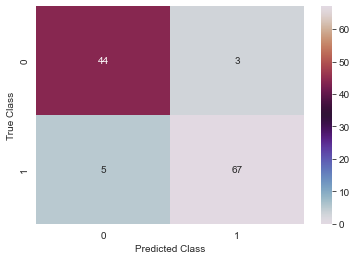

In [61]:
cm = confusion_matrix(y_test,prediction_cplx)
#plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=True, cmap='twilight')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

### Performance metrics from confusion matrix

In [62]:
#Performance metrics from confusion matrix 

FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, Recall, or true positive rate
TPR = TP/(TP+FN)

# Specificity or true negative rate
TNR = TN/(TN+FP) 

# Precision or positive predictive value
PPV = TP/(TP+FP)

# Negative predictive value
NPV = TN/(TN+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

# False negative rate
FNR = FN/(TP+FN)

# False discovery rate
FDR = FP/(TP+FP)


print('Class:',class_label)

print('Specificity:',TNR)
print('Specificity Mean:',TNR.mean())

print()

print('Class:',class_label)

print('Recall/Sensitivity:',TPR)
print('Recall/Sensitivity Mean:',TPR.mean())

print()

print('Class:',class_label)

print('Precision:',PPV)
print('Precision Mean:',PPV.mean())

print()

print('Class:',class_label)

print('False Positive Rate:',FPR)
print('False Positive Rate Mean:',FPR.mean())

print()

print('Class:',class_label)

print('False Negative Rate:',FNR)
print('False Negative Rate Mean:',FNR.mean())

print()

print('Class:',class_label)

print('False Discovery Rate:',FDR)
print('False Discovery Rate Mean:',FDR.mean())

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Specificity: [0.93055556 0.93617021]
Specificity Mean: 0.9333628841607565

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Recall/Sensitivity: [0.93617021 0.93055556]
Recall/Sensitivity Mean: 0.9333628841607565

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
Precision: [0.89795918 0.95714286]
Precision Mean: 0.9275510204081633

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Positive Rate: [0.06944444 0.06382979]
False Positive Rate Mean: 0.0666371158392435

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Negative Rate: [0.06382979 0.06944444]
False Negative Rate Mean: 0.0666371158392435

Class: {0: 'No Heart Disease', 1: 'Heart Disease'}
False Discovery Rate: [0.10204082 0.04285714]
False Discovery Rate Mean: 0.07244897959183674


### ROC Score


Heart Disease: ROC-AUC Score: = 0.940



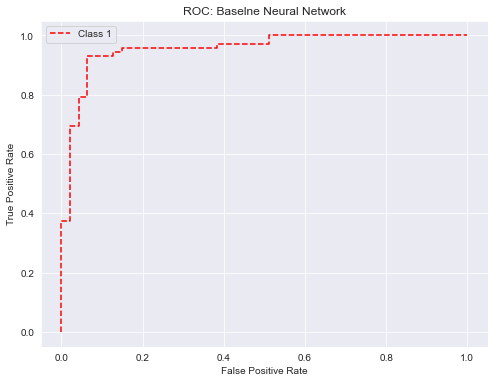

In [63]:
#ROC Plot
#from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

prediction_cplx = tuned_model.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prediction_cplx[:,-1], pos_label=i)

#y_score = classifier.fit(X_train, y_train).decision_function(X_test)
#See machinelearningmastery
# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])  
ns_probs=[0 for _ in range(len(y_test))]
lr_probs=model.predict_proba(X_test)
lr_probs=lr_probs[:,-1]
ns_auc=roc_auc_score(y_test,ns_probs)
lr_auc=roc_auc_score(y_test,lr_probs)
#print('No Heart Disease:ROC AUC=%.3f'%(ns_auc))
print()
print('Heart Disease: ROC-AUC Score: = %.3f'%(lr_auc))
print()
    
# plotting
plt.figure(figsize=(8, 6))
#plt.plot(fpr[0], tpr[0], linestyle='--',color='steelblue', label='Class 0')
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Class 1')
#plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
#plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
#plt.plot(fpr[4], tpr[4], linestyle='--',color='black', label='Class 4 vs Rest')
#plt.plot(fpr[5], tpr[5], linestyle='--',color='purple', label='Class 5 vs Rest')
#plt.plot(fpr[6], tpr[6], linestyle='--',color='yellow', label='Class 6 vs Rest')
plt.title('ROC: Baselne Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
#plt.savefig('RF ROC',dpi=300)

## Predictions and Confidences
 **Classes and Probabilities**

In [65]:
# Classes and Probabilities

prediction_probability = tuned_model.predict_proba(X_test)
prediction_cplx = tuned_model.predict_classes(X_test)

class_df = pd.DataFrame(prediction_cplx.round(3),columns=['Predicted class'])
proba_df = pd.DataFrame(prediction_probability.round(3),columns=['No heart disease','Heart disease'])

#pred_list = pd.concat(['frame','target_rs'],axis= 1)


predictions_df = pd.concat([proba_df,class_df ], axis=1)
predictions_df.head()

,No heart disease,Heart disease,Predicted class
0,0.029,0.971,1
1,0.251,0.749,1
2,0.991,0.009,0
3,0.018,0.982,1
4,0.427,0.573,1


### Index of incorrect predictions

In [66]:
# Incorrect predictions

incorrects = np.nonzero(prediction_cplx.reshape((-1,)) != y_test)
incorrects

(array([ 18,  40,  42,  60,  63,  76,  97, 101], dtype=int64),)

### Jaccard similarity coefficient

In [69]:
# Jaccard similarity coefficient
# Predicted class compared with actual class

jaccard = jaccard_score(y_test, prediction_cplx, average = None)#prediction_probability

jaccard_df = pd.DataFrame(jaccard,columns=['Jaccard score'])
jaccard_df

,Jaccard score
0,0.846154
1,0.893333


### Confidence interval

The confidence interval is a likelihood over a range. The true model skill may lie outside of this range.
 
**Commonly used number of standard deviations from the Gaussian distribution and their corresponding significance level are as follows:**

* 1.64 (90%)
* 1.96 (95%)
* 2.33 (98%)
* 2.58 (99%)

#### Using model error

In [67]:
# 95% confidence interval
# calculated radius of the confidence interval using model error

# where: interval = z * sqrt( (error * (1 - error)) / n)

interval = 1.96 * sqrt( (0.07 * (1 - .07)) / 119)
print('Classification error interval: %.3f' % interval)

Classification error interval: 0.046


* The classification error of the model is 7% +/- 5%
* The true classification error of the model on unseen data is likely between 2% and 12%.
 
 **The true model skill may lie outside of this range.**

### Upper and lower bounds of model accuracy

In [68]:
# Upper and lower bounds of model accuracy

# from statsmodels.stats.proportion import proportion_confint

lower, upper = proportion_confint(111, 119, 0.05)

print('Lower Bounds of Accuracy:%.3f ' % lower)
print('Upper Bounds of Accuracy:%.3f ' %upper)

Lower Bounds of Accuracy:0.888 
Upper Bounds of Accuracy:0.978 


 **The true classification accuracy of the model on unseen data is likely between 89% and 98%**.

 **True model skill may lie outside of this range.**

### Save the new model

In [70]:
tuned_model.save('HeartDis33_tuned.h5')

In [71]:
# Sanity check

reconstructed_model = keras.models.load_model('HeartDis33_tuned.h5')
reconstructed_model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 72)                1440      
_________________________________________________________________
dense_65 (Dense)             (None, 2)                 146       
Total params: 1,586
Trainable params: 1,586
Non-trainable params: 0
_________________________________________________________________


In [72]:
!ls -ltr HeartDis33_*

-rw-r--r-- 1 celie celie 45264 Mar  2 14:52 HeartDis33_tuned.h5


# Sample prediction and probabilities

In [107]:
# Sample prediction and probabilities

prediction_probability = reconstructed_model.predict_proba(X_test)
prediction_cplx = reconstructed_model.predict_classes(X_test)

print()
print('The probabilities of the sample are:',prediction_probability[10].round(3))
print()
print('The predicted class of the sample is:', prediction_cplx[10])
print()
print('Index of incorrects:',incorrects)

predictions_df.head(11)


The probabilities of the sample are: [0.91 0.09]

The predicted class of the sample is: 0

Index of incorrects: (array([ 18,  40,  42,  60,  63,  76,  97, 101], dtype=int64),)


,No heart disease,Heart disease,Predicted class
0,0.029,0.971,1
1,0.251,0.749,1
2,0.991,0.009,0
3,0.018,0.982,1
4,0.427,0.573,1
5,0.009,0.991,1
6,0.936,0.064,0
7,0.784,0.216,0
8,0.719,0.281,0
9,0.850,0.150,0
